In [1]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
"""
Custom data generator to work with BraTS2021 dataset.
Can be used as a template to create your own custom data generators. 
No image processing operations are performed here, just load data from local directory
in batches. 
"""

def load_img(img_dir, img_list):
    images=[]
    for i, image_name in enumerate(img_list):    
        if (image_name.split('.')[1] == 'npy'):
            
            image = np.load(img_dir+image_name)
                      
            images.append(image)
    images = np.array(images)
    
    return(images)

def load_img_FTT(img_dir, img_list):
    images=[]
    for i, image_name in enumerate(img_list):    
        if (image_name.split('.')[1] == 'npy'):
            
            image = np.load(img_dir+image_name)[...,:3]
                      
            images.append(image)
    images = np.array(images)
    
    return(images)

def load_img_mod(img_dir, img_list, modality):
    images=[]
    for i, image_name in enumerate(img_list):    
        if (image_name.split('.')[1] == 'npy'):
            
            image = np.load(img_dir+image_name)[...,modality]
                      
            images.append(image)
    images = np.array(images)
    
    return(images)

def load_mask(img_dir, img_list, mask_type):
    images=[]
    for i, image_name in enumerate(img_list):    
        if (image_name.split('.')[1] == 'npy'):
            
            image = np.load(img_dir+image_name).astype('float32')
#             print(image.shape)         
            images.append(image[..., mask_type])
    images = np.array(images)
    
    return(images)

def imageLoader(img_dir, img_list, mask_dir, mask_list, batch_size, modality , mask_type):

    L = len(img_list)
    if modality == 'All':
        #keras needs the generator infinite, so we will use while true  
        while True:

            batch_start = 0
            batch_end = batch_size

            while batch_start < L:
                limit = min(batch_end, L)

                X = load_img(img_dir, img_list[batch_start:limit])
                Y = load_mask(mask_dir, mask_list[batch_start:limit], mask_type)

                yield (X,Y) #a tuple with two numpy arrays with batch_size samples     

                batch_start += batch_size   
                batch_end += batch_size
    
    elif modality == 'Flair_T2_T1ce':
        while True:

            batch_start = 0
            batch_end = batch_size

            while batch_start < L:
                limit = min(batch_end, L)

                X = load_img_FTT(img_dir, img_list[batch_start:limit])
                Y = load_mask(mask_dir, mask_list[batch_start:limit], mask_type)

                yield (X,Y) #a tuple with two numpy arrays with batch_size samples     

                batch_start += batch_size   
                batch_end += batch_size
    
        
    else:
        #Load specific modality
        while True:

            batch_start = 0
            batch_end = batch_size

            while batch_start < L:
                limit = min(batch_end, L)

                X = load_img_mod(img_dir, img_list[batch_start:limit], modality)
                Y = load_mask(mask_dir, mask_list[batch_start:limit], mask_type)

                yield (X,Y) #a tuple with two numpy arrays with batch_size samples     

                batch_start += batch_size   
                batch_end += batch_size

In [3]:
#Define the image generators for training and validation

train_img_dir = "./data2/train/images/"
train_mask_dir = "./data2/train/masks/"

train_img_list=list(np.sort(os.listdir(train_img_dir)))
train_mask_list = list(np.sort(os.listdir(train_mask_dir)))

In [4]:
'''
Modalities
0 - Flair
2 - T2
1 - T1ce
3 - T1
'All' - for all above

Mask-Type
0 - Whole Tumor
1 - Tumor Core
2 - Enhancing Tumor
'''

batch_size = 16

train_img_datagen = imageLoader(train_img_dir, train_img_list, 
                                    train_mask_dir, train_mask_list, batch_size,'All',0)


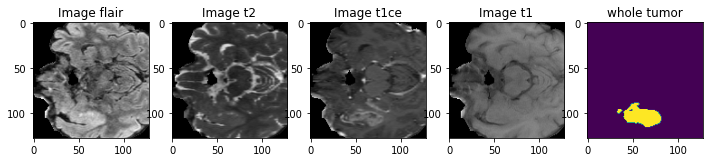

In [5]:
#Verify generator.... In python 3 next() is renamed as __next__()
img, msk = train_img_datagen.__next__()


img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(151)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(152)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t2')
plt.subplot(153)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t1ce')
plt.subplot(154)
plt.imshow(test_img[:,:,n_slice, 3], cmap='gray')
plt.title('Image t1')
plt.subplot(155)
plt.imshow(test_mask[:,:,n_slice])
plt.title('whole tumor')
plt.show()